<a href="https://colab.research.google.com/github/FerdousJUST/InceptionV3-model-implementation-for-Fish-Image-Classification-/blob/main/RESTNET_50_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import PIL 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 

In [2]:
data_dir = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training"

In [4]:
img_height = 128
img_width = 128
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = 'categorical',
    image_size = (128,128),
    batch_size = 32

)

Found 4800 files belonging to 4 classes.
Using 3840 files for training.


In [5]:
img_height = 128
img_width = 128
batch_size = 32
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    label_mode = 'categorical',
    image_size = (128,128),
    batch_size = 32

)

Found 4800 files belonging to 4 classes.
Using 960 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Barbel_Fish', 'Hilsha_Fish', 'Spotted_Snakehead_Fish', 'Tilapia_Fish']


In [7]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape = (128,128,3),
                                                  pooling = 'avg',classes=4,
                                                  weights = 'imagenet')

for layer in pretrained_model.layers:
  layer.trainable = False


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(4,activation = 'softmax'))


94765736/94765736 [==============================] - 0s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 4)                2052      
 pper)                                                           
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
____________________________________

In [9]:
resnet_model.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
epochs = 10
history = resnet_model.fit(train_ds,
                           validation_data=val_ds,
                           epochs = epochs
                           )

Epoch 1/10
120/120 [==============================] - 747s 6s/step - loss: 0.2681 - accuracy: 0.9307 - val_loss: 0.0449 - val_accuracy: 0.9781
Epoch 2/10
120/120 [==============================] - 280s 2s/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 3/10
120/120 [==============================] - 242s 2s/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.0265 - val_accuracy: 0.9875
Epoch 4/10
120/120 [==============================] - 241s 2s/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0197 - val_accuracy: 0.9906
Epoch 5/10
120/120 [==============================] - 241s 2s/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 6/10
120/120 [==============================] - 241s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.9990
Epoch 7/10
120/120 [==============================] - 241s 2s/step - loss: 7.7884e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.

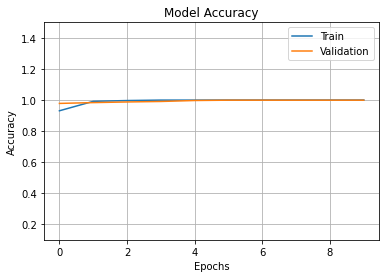

In [18]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin = 0.1,ymax =1.5)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()         

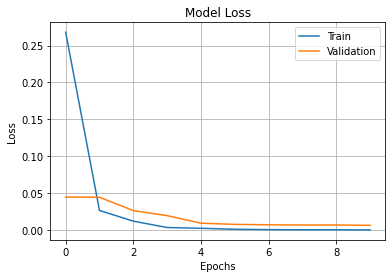

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show()

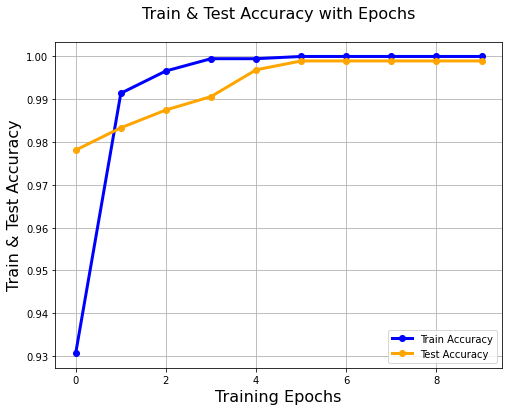

In [13]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

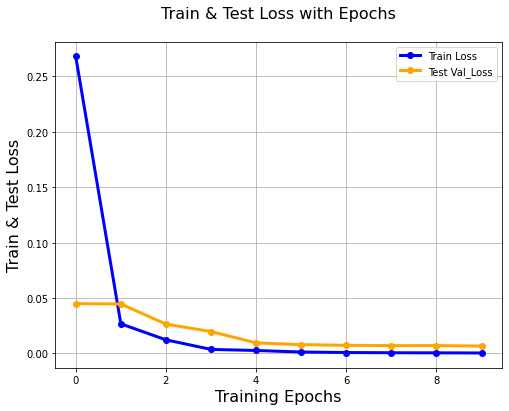

In [14]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

In [24]:
acc = resnet_model.evaluate(val_ds,steps = len(val_ds),verbose = 2)
print('%.2f'%(acc[1]*100))

30/30 - 49s - loss: 0.0066 - accuracy: 0.9990 - 49s/epoch - 2s/step
99.90


In [25]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 1s 983ms/step
[[2.5327412e-15 2.2800716e-16 8.9036302e-14 1.0000000e+00]]
[3, 2, 0, 1]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [26]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 003.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 139ms/step
[[8.850744e-06 2.283888e-18 9.999912e-01 7.484673e-09]]
[2, 0, 3, 1]
Spotted_Snakehead_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [27]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 003.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 90ms/step
[[2.7693989e-04 9.9966180e-01 1.7098753e-05 4.4154465e-05]]
[1, 0, 3, 2]
Hilsha_Fish : 99.97 %
Barbel_Fish : 0.03 %
Tilapia_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %


In [28]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 005.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 91ms/step
[[9.9559444e-01 8.6970704e-07 3.5861295e-03 8.1861741e-04]]
[0, 2, 3, 1]
Barbel_Fish : 99.56 %
Spotted_Snakehead_Fish : 0.36 %
Tilapia_Fish : 0.08 %
Hilsha_Fish : 0.0 %


In [30]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/hilsha1.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = resnet_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 182ms/step
[[4.8275339e-10 1.0000000e+00 1.0463915e-18 6.1213284e-11]]
[1, 0, 3, 2]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %


In [32]:
y_pred = resnet_model.predict(val_ds)

30/30 [==============================] - 50s 2s/step


In [33]:
y_pred = np.argmax(y_pred,axis = 1)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

print(classification_report(val_ds,y_pred))

ValueError: ignored